# Metrics

Previously, we found a metric that might be helpful. We want to explore how else to measure effects of 
- Taking an ambulance in or out of the picture. We want to know how to recommend what ambulances to choose.
- Deciding on consecutive/ simultaneous dispatches of ambulances may help inform this as well. That other question would be done in another notebook, so I may switch to that notebook, then come back.

In [1]:
# Apparently calling the following twice helps. 
%matplotlib notebook
%matplotlib notebook


import src.read_data as read_data
import numpy as np

from matplotlib import pyplot as plt


import copy
import time

import src.compute as compute



In [2]:
# Data
(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()

allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

num_ambulances = 8

In [3]:
# This function call is based on the last quarter's cell. 
# Uses a greedy algorithm to find the 

ind = compute.choose_start_bases_greedy(allbases, demands, times, calls_latlong)

(969, 100)
(969, 72)
(969, 54)
(969, 38)
(969, 26)
(969, 19)
(969, 15)
(969, 11)
Total Covered:  92


In [4]:
# ind = np.random.randint(0, allbases.shape[0], num_ambulances)

bases = allbases[ind,:]

points = np.delete(allbases, ind, 0)

chosen_base_costs = times[ind,:]

# Randomly choose a demand point
call_location = np.random.randint(0, high=100)
call_location

57

In [5]:
# Fastest it can get there
current_travel_times = chosen_base_costs[:, call_location]
fastest = np.min(current_travel_times)
ambulance = -1

# Which ambulance to choose from chosen_base_costs? 
for amb in range(len(current_travel_times)):
    if fastest == current_travel_times[amb]:
        ambulance = amb
        break
ambulance, fastest, current_travel_times


(0, 540.0, array([ 540., 1085., 1894.,  658., 1359., 1414.,  851.,  870.]))

In [6]:
def ind_to_set_of_ind_one_removed(chosen_base_costs):
    """ Returns the set of all sets of bases with one ambulance removed. """
    
    all_one_removed = []
    for i in range(len(chosen_base_costs)):
        all_one_removed.append(np.delete(chosen_base_costs, i, axis=0))
    return all_one_removed

In [7]:
all_one_removed = ind_to_set_of_ind_one_removed(chosen_base_costs)
all_one_removed

[array([[ 804.,  681.,  954., 1054.,  267.,  281.,  635.,  772., 1091.,
          986.,  545.,  442.,  329.,  545., 1236., 1055.,  500.,  679.,
          514.,  453.,  493.,  461.,  571.,  411.,  693.,  762.,  936.,
          932., 1274., 1191.,  962.,  986.,  973.,  805.,  776.,  671.,
          709.,  695.,  368.,  438., 1294., 1317., 1268., 1192., 1535.,
         2007.,  429.,  829., 1803., 1969.,  693.,  894.,  721.,  589.,
          750., 1210., 1365., 1085.,  927.,  453.,  640., 1260.,  999.,
         1064., 1061.,  881., 1039.,  509., 1055., 1323.,  193.,  853.,
         1139., 1474., 1410., 1712., 1271., 1200.,  982.,  398., 1436.,
          526.,  834.,  964., 1091., 1726., 1109.,  564.,  508.,  584.,
          585.,  738., 1772.,  636.,  861., 1035.,  762., 1660.,  444.,
          868.],
        [ 384.,  449.,  301.,  265., 1015.,  891., 1564., 1688.,  410.,
          541., 1462., 1360.,  816.,  953.,  780.,  593., 1051.,  982.,
          832.,  775., 1285., 1146., 1197.,  97

In [8]:
def radius_to_coverage (chosen_costs, r1=600, graph=True):
    r1_coverage = np.any(chosen_costs < r1, 0)
    r1_covered = np.nonzero(r1_coverage)
    r1_exposed = np.nonzero(np.logical_not(r1_coverage))

    c = np.shape(r1_covered)[1]
    e = np.shape(r1_exposed)[1]
    ratio = (c / (c + e))
    

    if graph:
        plt.figure()
        plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
        plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
        plt.scatter(demands[call_location,0], demands[call_location,1], c='green')
        plt.scatter(bases[:,0],bases[:,1], c='y')
        plt.show()

    
    return 100 * ratio

<IPython.core.display.Javascript object>


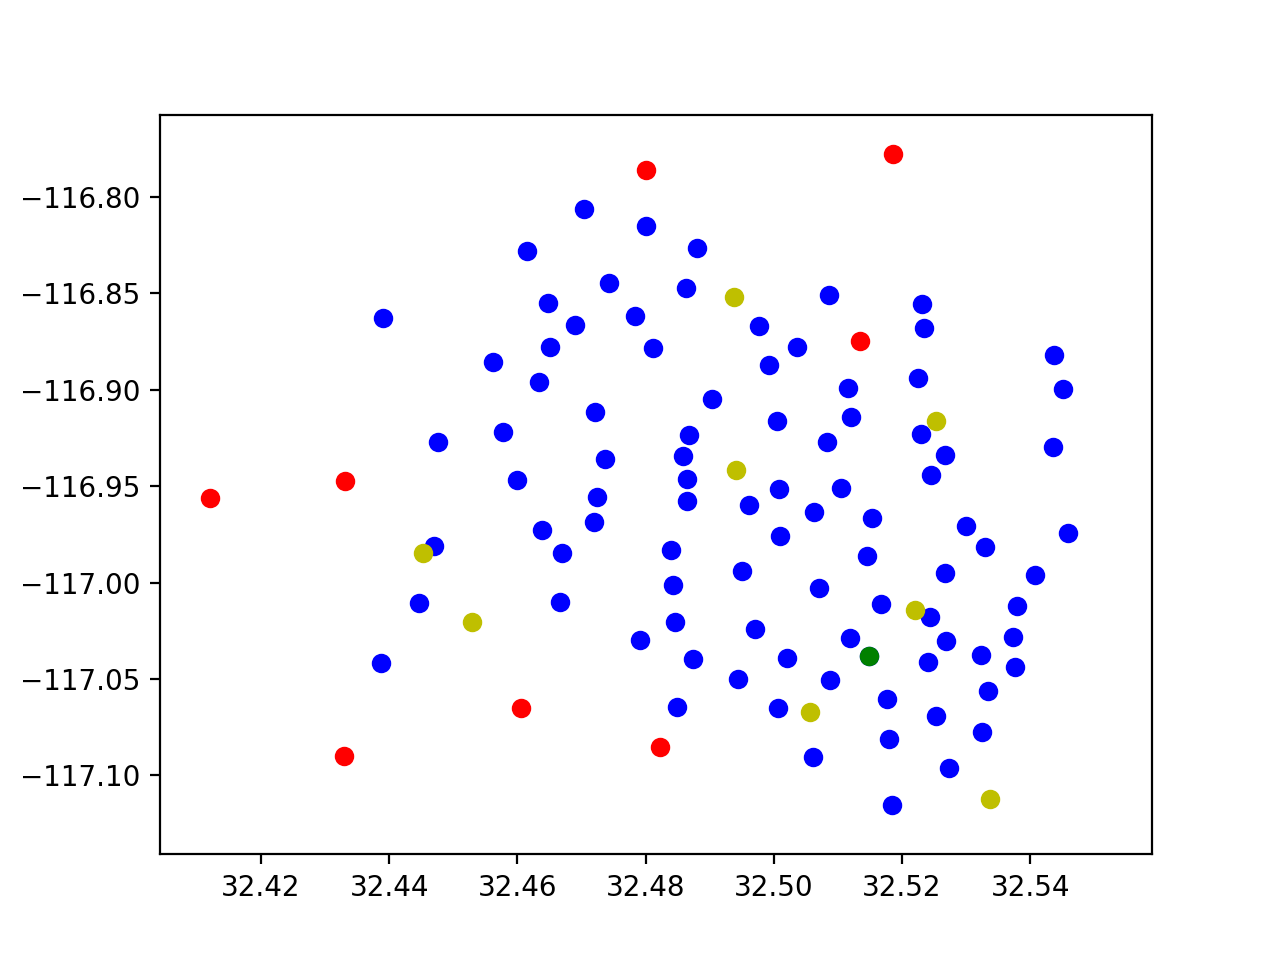

92.0

In [9]:
c = radius_to_coverage(chosen_base_costs)
c
